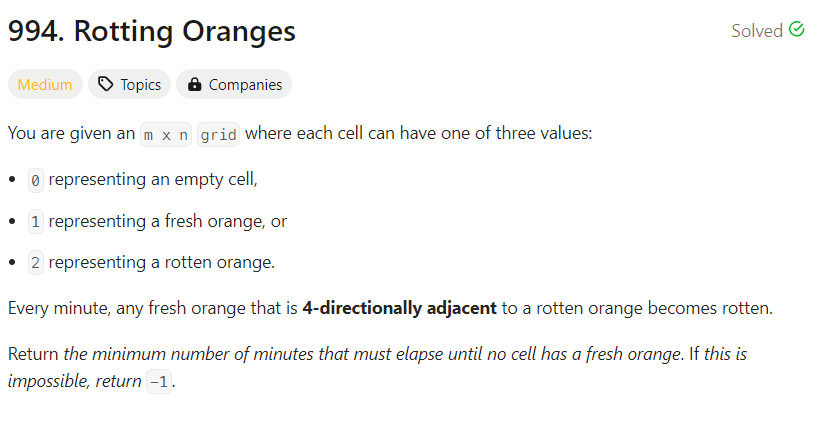

In [ ]:
# BFS Solution
# Time: O(MN) where the grid size is MXN
# Memory: O(MN)

class Solution:
    def orangesRotting(self, grid: List[List[int]]) -> int:
        m, n = len(grid), len(grid[0])
        # Find all fresh and rotten oranges
        freshCount = 0
        bfs = deque()
        for i in range(m):
            for j in range(n):
                if grid[i][j] == 1:
                    freshCount += 1
                elif grid[i][j] == 2:
                    bfs.append((i, j))
        # No fresh no game
        if freshCount == 0:
            return 0
        # Let the rot spread
        time = -1
        cellCheck = lambda i, j: 0 <= i < m and 0 <= j < n and grid[i][j] == 1
        while bfs:
            for _ in range(len(bfs)):
                i, j = bfs.popleft()
                for ii, jj in [(1, 0), (0, 1), (-1, 0), (0, -1)]:
                    newI, newJ = i+ii, j+jj
                    if cellCheck(newI, newJ):
                        grid[newI][newJ] = 2
                        bfs.append((newI, newJ))
                        freshCount -= 1

            time += 1
        return time if freshCount == 0 else -1